##Analysing the emotion of presentation

Installation

In [1]:
!pip install pydub websocket-client

In [2]:
!pip install pypinyin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.0/837.0 kB 21.0 MB/s eta 0:00:00


In [3]:
!pip install zhipuai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.10.1
    Uninstalling PyJWT-2.10.1:
      Successfully uninstalled PyJWT-2.10.1


In [4]:
!pip install --upgrade zhipuai

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import json

# Load the JSON file
with open('/content/drive/MyDrive/Colab Notebooks/Capstone (Archived)/Poem Database/poem_database.json', 'r') as file:
    data = json.load(file)

# Extract poem titles
poem_name_list = [poem['title'] for poem in data['poems']]
print("Available Poems:")
for index, title in enumerate(poem_name_list):
    print(f"{index + 1}: {title}")

# Prompt user to select a poem by number or name
while True:
    user_input = input("Please enter the number or name of the poem you want to select: ").strip()

    # Check if the input is a number
    if user_input.isdigit():
        poem_index = int(user_input) - 1
        if 0 <= poem_index < len(poem_name_list):
            poem_name = poem_name_list[poem_index]
            print(f"You selected: {poem_name}")
            break
        else:
            print("Invalid number. Please enter a valid number corresponding to the available poems.")
    else:
        # Check if the input is a poem name
        if user_input in poem_name_list:
            poem_index = poem_name_list.index(user_input)
            poem_name = poem_name_list[poem_index]
            print(f"You selected: {poem_name}")
            break
        else:
            print("Invalid name. Please enter a valid poem name or number.")

    print()  # Add a newline for better readability

Available Poems:
1: 感遇四首其一
2: 感遇四首其二
3: 感遇四首其三
4: 感遇四首其四
5: 下终南山过斛斯山人宿置酒
6: 月下独酌
7: 春思
8: 望岳
9: 赠卫八处士
10: 佳人
11: 梦李白二首·其一
12: 梦李白二首·其二
13: 送别
14: 送綦毋潜落第还乡
15: 青溪
16: 渭川田家
17: 西施咏
18: 同从弟南斋玩月忆山阴崔少府
19: 郡斋雨中与诸文士燕集
20: 初发扬子寄元大校书
21: 寄全椒山中道士
22: 长安遇冯著
23: 夕次盱眙县
24: 东郊
25: 送杨氏女
26: 晨诣超师院读禅经
27: 溪居
28: 塞上曲·其一
29: 塞下曲
30: 关山月
31: 子夜四时歌·春歌
32: 子夜四时歌·夏歌
33: 子夜四时歌·秋歌
34: 子夜四时歌·冬歌
35: 烈女操
36: 游子吟
37: 登幽州台歌
38: 古意
39: 送陈章甫
40: 琴歌
41: 听董大弹胡笳弄兼寄语房给事
42: 听安万善吹觱篥歌
43: 夜归鹿门山歌
44: 庐山谣寄卢侍御虚舟
45: 梦游天姥吟留别 
46: 金陵酒肆留别 
Please enter the number or name of the poem you want to select: 感遇四首其一
You selected: 感遇四首其一


In [7]:
# Debugging: Output the value and type of poem_index
try:
    print("Debug: poem_index value is", poem_index)
    print("Debug: poem_index type is", type(poem_index))

    # Retrieve the poem's content and audio path
    poem_title = data['poems'][poem_index]['title']
    poem_content = data['poems'][poem_index]['content']
    poem_path = data['poems'][poem_index]['audio_path']

    # Print the content of the poem
    print("Poem Content:")
    print(poem_content)

except IndexError as e:
    print("IndexError:", e)
    print("The value of poem_index may be out of range. Please check the available poems.")
except Exception as e:
    print("An unexpected error occurred:", e)

Debug: poem_index value is 0
Debug: poem_index type is <class 'int'>
Poem Content:
孤鸿海上来，池潢不敢顾。侧见双翠鸟，巢在三珠树。矫矫珍木巅，得无金丸惧？美服患人指，高明逼神恶？今我游冥冥，弋者何所慕！


In [8]:
from pydub import AudioSegment
import wave

def convert_mp3_to_pcm(mp3_file_path, output_pcm_path):
    # Load MP3 file
    audio = AudioSegment.from_mp3(mp3_file_path)

    # Convert to PCM
    samples = audio.set_channels(1).set_frame_rate(16000).get_array_of_samples()

    # Save to a WAV file (PCM data)
    with wave.open(output_pcm_path, 'wb') as wav:
        wav.setnchannels(1)  # Mono
        wav.setsampwidth(audio.sample_width)
        wav.setframerate(16000)
        wav.writeframes(samples.tobytes())

    print(f"File converted and saved to {output_pcm_path}")

Convert MP3 files or wav files to wav files.

In [9]:
# Define the base path for your Google Drive
base_path = '/content/drive/MyDrive/Colab Notebooks/Capstone (Archived)/Poem Database/'

# Construct the full path to the audio file
full_poem_path = base_path + data['poems'][poem_index]['audio_path'].lstrip('./')  # Remove leading './' if necessary

# Convert and save directly to Colab's local file system
output_pcm_path = "/content/output_file.wav"
convert_mp3_to_pcm(full_poem_path, output_pcm_path)

File converted and saved to /content/output_file.wav


Play the MP3 file

In [10]:
from IPython.display import Audio, display

def play_original_mp3(mp3_file_path):
    # Create an Audio widget
    audio = Audio(mp3_file_path)
    # Display and play the audio
    display(audio)

# Play the original MP3 using the full path
play_original_mp3(full_poem_path)

Utilize the iFly API to listen to and extract the spoken words from the audio file.

In [11]:
import websocket
import datetime
import hashlib
import base64
import hmac
import json
from urllib.parse import urlencode
import time
import ssl
from wsgiref.handlers import format_date_time
from datetime import datetime
from time import mktime
import _thread as thread

STATUS_FIRST_FRAME = 0  # 第一帧的标识
STATUS_CONTINUE_FRAME = 1  # 中间帧标识
STATUS_LAST_FRAME = 2  # 最后一帧的标识


class Ws_Param(object):
    # 初始化
    def __init__(self, APPID, APIKey, APISecret, AudioFile):
        self.APPID = APPID
        self.APIKey = APIKey
        self.APISecret = APISecret
        self.AudioFile = AudioFile

        # 公共参数(common)
        self.CommonArgs = {"app_id": self.APPID}
        # 业务参数(business)，更多个性化参数可在官网查看
        self.BusinessArgs = {"domain": "iat", "language": "zh_cn", "accent": "mandarin", "vinfo":1,"vad_eos":10000}

    # 生成url
    def create_url(self):
        url = 'wss://ws-api.xfyun.cn/v2/iat'
        # 生成RFC1123格式的时间戳
        now = datetime.now()
        date = format_date_time(mktime(now.timetuple()))

        # 拼接字符串
        signature_origin = "host: " + "ws-api.xfyun.cn" + "\n"
        signature_origin += "date: " + date + "\n"
        signature_origin += "GET " + "/v2/iat " + "HTTP/1.1"
        # 进行hmac-sha256进行加密
        signature_sha = hmac.new(self.APISecret.encode('utf-8'), signature_origin.encode('utf-8'),
                                 digestmod=hashlib.sha256).digest()
        signature_sha = base64.b64encode(signature_sha).decode(encoding='utf-8')

        authorization_origin = "api_key=\"%s\", algorithm=\"%s\", headers=\"%s\", signature=\"%s\"" % (
            self.APIKey, "hmac-sha256", "host date request-line", signature_sha)
        authorization = base64.b64encode(authorization_origin.encode('utf-8')).decode(encoding='utf-8')
        # 将请求的鉴权参数组合为字典
        v = {
            "authorization": authorization,
            "date": date,
            "host": "ws-api.xfyun.cn"
        }
        # 拼接鉴权参数，生成url
        url = url + '?' + urlencode(v)
        # print("date: ",date)
        # print("v: ",v)
        # 此处打印出建立连接时候的url,参考本demo的时候可取消上方打印的注释，比对相同参数时生成的url与自己代码生成的url是否一致
        # print('websocket url :', url)
        return url


# 收到websocket消息的处理
def on_message(ws, message):
    try:
        code = json.loads(message)["code"]
        sid = json.loads(message)["sid"]
        if code != 0:
            errMsg = json.loads(message)["message"]
            print("sid:%s call error:%s code is:%s" % (sid, errMsg, code))

        else:
            data = json.loads(message)["data"]["result"]["ws"]
            # print(json.loads(message))
            result = ""
            for i in data:
                for w in i["cw"]:
                    result += w["w"]
            print("sid:%s call success!,data is:%s" % (sid, json.dumps(data, ensure_ascii=False)))
    except Exception as e:
        print("receive msg,but parse exception:", e)



# 收到websocket错误的处理
def on_error(ws, error):
    print("### error:", error)


# 收到websocket关闭的处理
def on_close(ws,a,b):
    print("### closed ###")


# 收到websocket连接建立的处理
def on_open(ws):
    def run(*args):
        frameSize = 8000  # 每一帧的音频大小
        intervel = 0.04  # 发送音频间隔(单位:s)
        status = STATUS_FIRST_FRAME  # 音频的状态信息，标识音频是第一帧，还是中间帧、最后一帧

        with open(wsParam.AudioFile, "rb") as fp:
            while True:
                buf = fp.read(frameSize)
                # 文件结束
                if not buf:
                    status = STATUS_LAST_FRAME
                # 第一帧处理
                # 发送第一帧音频，带business 参数
                # appid 必须带上，只需第一帧发送
                if status == STATUS_FIRST_FRAME:

                    d = {"common": wsParam.CommonArgs,
                         "business": wsParam.BusinessArgs,
                         "data": {"status": 0, "format": "audio/L16;rate=16000",
                                  "audio": str(base64.b64encode(buf), 'utf-8'),
                                  "encoding": "raw"}}
                    d = json.dumps(d)
                    ws.send(d)
                    status = STATUS_CONTINUE_FRAME
                # 中间帧处理
                elif status == STATUS_CONTINUE_FRAME:
                    d = {"data": {"status": 1, "format": "audio/L16;rate=16000",
                                  "audio": str(base64.b64encode(buf), 'utf-8'),
                                  "encoding": "raw"}}
                    ws.send(json.dumps(d))
                # 最后一帧处理
                elif status == STATUS_LAST_FRAME:
                    d = {"data": {"status": 2, "format": "audio/L16;rate=16000",
                                  "audio": str(base64.b64encode(buf), 'utf-8'),
                                  "encoding": "raw"}}
                    ws.send(json.dumps(d))
                    time.sleep(1)
                    break
                # 模拟音频采样间隔
                time.sleep(intervel)
        ws.close()

    thread.start_new_thread(run, ())


if __name__ == "__main__":
    # 测试时候在此处正确填写相关信息即可运行
    time1 = datetime.now()
    wsParam = Ws_Param(APPID='6a272d13', APISecret='YmI0ZTljYjdlMTY5MzY4YzY3YTc4Yjdk',
                       APIKey='b39181ec6c5522fae460f3047f16868b',
                       AudioFile=r'/content/output_file.wav')
    websocket.enableTrace(False)
    wsUrl = wsParam.create_url()
    ws = websocket.WebSocketApp(wsUrl, on_message=on_message, on_error=on_error, on_close=on_close)
    ws.on_open = on_open
    ws.run_forever(sslopt={"cert_reqs": ssl.CERT_NONE})
    time2 = datetime.now()
    print(time2-time1)


sid:iat000d721d@dx197b1114004a12c802 call success!,data is:[{"bg": 0, "cw": [{"sc": 0, "w": "感"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "遇"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "四"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "首"}]}, {"cw": [{"sc": 0, "w": "之"}], "bg": 0}, {"bg": 0, "cw": [{"w": "一", "sc": 0}]}]
sid:iat000d721d@dx197b1114004a12c802 call success!,data is:[{"bg": 0, "cw": [{"sc": 0, "w": "张"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "九"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "龄"}]}]
sid:iat000d721d@dx197b1114004a12c802 call success!,data is:[{"bg": 0, "cw": [{"sc": 0, "w": "。"}]}, {"cw": [{"sc": 0, "w": "孤"}], "bg": 0}, {"bg": 0, "cw": [{"sc": 0, "w": "鸿"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "海"}]}, {"bg": 0, "cw": [{"w": "上来", "sc": 0}]}, {"bg": 0, "cw": [{"sc": 0, "w": "，"}]}, {"bg": 0, "cw": [{"w": "池", "sc": 0}]}, {"bg": 0, "cw": [{"sc": 0, "w": "潢"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "不敢"}]}, {"bg": 0, "cw": [{"sc": 0, "w": "顾"}]}]
sid:iat000d721d@dx197b1114004a12c802 call success!,data is

Extract the words detected along with their corresponding timestamps, and store this information in a variable for future use.

In [12]:
import websocket
import json
import base64
import hmac
import hashlib
from urllib.parse import urlencode
from wsgiref.handlers import format_date_time
from datetime import datetime
from time import mktime
import time
import ssl
import _thread as thread

STATUS_FIRST_FRAME = 0
STATUS_CONTINUE_FRAME = 1
STATUS_LAST_FRAME = 2
global word_timings

class Ws_Param(object):
    def __init__(self, APPID, APIKey, APISecret, AudioFile):
        self.APPID = APPID
        self.APIKey = APIKey
        self.APISecret = APISecret
        self.AudioFile = AudioFile
        self.CommonArgs = {"app_id": self.APPID}
        self.BusinessArgs = {"domain": "iat", "language": "zh_cn", "accent": "mandarin", "vinfo":1, "vad_eos":10000}

    def create_url(self):
        url = 'wss://ws-api.xfyun.cn/v2/iat'
        now = datetime.now()
        date = format_date_time(mktime(now.timetuple()))
        signature_origin = "host: ws-api.xfyun.cn\n" + "date: " + date + "\n" + "GET /v2/iat HTTP/1.1"
        signature_sha = hmac.new(self.APISecret.encode('utf-8'), signature_origin.encode('utf-8'), hashlib.sha256).digest()
        signature_sha = base64.b64encode(signature_sha).decode('utf-8')
        authorization_origin = f"api_key=\"{self.APIKey}\", algorithm=\"hmac-sha256\", headers=\"host date request-line\", signature=\"{signature_sha}\""
        authorization = base64.b64encode(authorization_origin.encode('utf-8')).decode('utf-8')
        v = {"authorization": authorization, "date": date, "host": "ws-api.xfyun.cn"}
        url = url + '?' + urlencode(v)
        return url

word_timings = []

def on_message(ws, message):
    global word_timings
    try:
        response = json.loads(message)
        if response["code"] != 0:
            print(f"Error: {response['message']} (Code: {response['code']})")
        else:
            data = response["data"]["result"]["ws"]
            for i in data:
                for w in i["cw"]:
                    word = w['w']
                    start_time = int(i['bg']) * 10
                    word_timings.append((start_time, word))
    except Exception as e:
        print("Parsing error:", e)

def on_error(ws, error):
    print("Error:", error)

def on_close(ws, a, b):
    global word_timings
    print("WebSocket closed")
    print("Final Word Timings:", word_timings)

def on_open(ws):
    def run(*args):
        frameSize = 8000
        intervel = 0.04
        status = STATUS_FIRST_FRAME
        with open(wsParam.AudioFile, "rb") as fp:
            while True:
                buf = fp.read(frameSize)
                if not buf:
                    status = STATUS_LAST_FRAME
                if status == STATUS_FIRST_FRAME:
                    d = {"common": wsParam.CommonArgs, "business": wsParam.BusinessArgs, "data": {"status": 0, "format": "audio/L16;rate=16000", "audio": str(base64.b64encode(buf), 'utf-8'), "encoding": "raw"}}
                    ws.send(json.dumps(d))
                    status = STATUS_CONTINUE_FRAME
                elif status == STATUS_CONTINUE_FRAME:
                    d = {"data": {"status": 1, "format": "audio/L16;rate=16000", "audio": str(base64.b64encode(buf), 'utf-8'), "encoding": "raw"}}
                    ws.send(json.dumps(d))
                elif status == STATUS_LAST_FRAME:
                    d = {"data": {"status": 2, "format": "audio/L16;rate=16000", "audio": str(base64.b64encode(buf), 'utf-8'), "encoding": "raw"}}
                    ws.send(json.dumps(d))
                    time.sleep(1)
                    break
                time.sleep(intervel)
        ws.close()
    thread.start_new_thread(run, ())

if __name__ == "__main__":
    wsParam = Ws_Param(APPID='6a272d13', APISecret='YmI0ZTljYjdlMTY5MzY4YzY3YTc4Yjdk', APIKey='b39181ec6c5522fae460f3047f16868b', AudioFile=r'/content/output_file.wav')
    websocket.enableTrace(False)
    wsUrl = wsParam.create_url()
    ws = websocket.WebSocketApp(wsUrl, on_message=on_message, on_error=on_error, on_close=on_close)
    ws.on_open = on_open
    ws.run_forever(sslopt={"cert_reqs": ssl.CERT_NONE})

    # Use word_timings as needed after the WebSocket connection closes.

WebSocket closed
Final Word Timings: [(0, '感'), (0, '遇'), (0, '四'), (0, '首'), (0, '之'), (0, '一'), (0, '张'), (0, '九'), (0, '龄'), (0, '。'), (0, '孤'), (0, '鸿'), (0, '海'), (0, '上来'), (0, '，'), (0, '池'), (0, '潢'), (0, '不敢'), (0, '顾'), (0, '。'), (0, '侧'), (0, '见'), (0, '双'), (0, '翠'), (0, '鸟巢'), (0, '在'), (0, '三'), (0, '珠'), (0, '树'), (0, '。'), (0, '乔'), (0, '巧'), (0, '珍'), (0, '木'), (0, '巅'), (0, '，'), (0, '得'), (0, '无'), (0, '金'), (0, '丸'), (0, '惧'), (0, '。'), (0, '美'), (0, '服'), (0, '患'), (0, '人'), (0, '指'), (0, '，'), (0, '高明'), (0, '逼'), (0, '神'), (0, '物'), (0, '，'), (0, '今'), (0, '我'), (0, '游'), (0, '冥冥'), (0, '，'), (0, '弋'), (0, '者'), (0, '何'), (0, '所'), (0, '慕'), (0, '。')]


In [13]:
import websocket
import json
import base64
import hmac
import hashlib
from urllib.parse import urlencode
from wsgiref.handlers import format_date_time
from datetime import datetime
from time import mktime
import time
import ssl
import _thread as thread

STATUS_FIRST_FRAME = 0
STATUS_CONTINUE_FRAME = 1
STATUS_LAST_FRAME = 2
global word_timings

class Ws_Param(object):
    def __init__(self, APPID, APIKey, APISecret, AudioFile):
        self.APPID = APPID
        self.APIKey = APIKey
        self.APISecret = APISecret
        self.AudioFile = AudioFile
        self.CommonArgs = {"app_id": self.APPID}
        # Enhanced business args for better timing
        self.BusinessArgs = {
            "domain": "iat",
            "language": "zh_cn",
            "accent": "mandarin",
            "vinfo": 1,  # Enable word timing
            "vad_eos": 10000,
            "ptt": 1,  # Additional timing parameter
            "rlang": "zh-cn",  # Explicit language
            "nunum": 0  # Disable number conversion
        }

    def create_url(self):
        url = 'wss://ws-api.xfyun.cn/v2/iat'
        now = datetime.now()
        date = format_date_time(mktime(now.timetuple()))
        signature_origin = "host: ws-api.xfyun.cn\n" + "date: " + date + "\n" + "GET /v2/iat HTTP/1.1"
        signature_sha = hmac.new(self.APISecret.encode('utf-8'), signature_origin.encode('utf-8'), hashlib.sha256).digest()
        signature_sha = base64.b64encode(signature_sha).decode('utf-8')
        authorization_origin = f"api_key=\"{self.APIKey}\", algorithm=\"hmac-sha256\", headers=\"host date request-line\", signature=\"{signature_sha}\""
        authorization = base64.b64encode(authorization_origin.encode('utf-8')).decode('utf-8')
        v = {"authorization": authorization, "date": date, "host": "ws-api.xfyun.cn"}
        url = url + '?' + urlencode(v)
        return url

word_timings = []
debug_responses = []

def on_message(ws, message):
    global word_timings, debug_responses
    try:
        response = json.loads(message)

        # Store response for debugging
        debug_responses.append(response)

        print("="*50)
        print("Full response:", json.dumps(response, indent=2, ensure_ascii=False))
        print("="*50)

        if response["code"] != 0:
            print(f"Error: {response['message']} (Code: {response['code']})")
        else:
            # Check if result exists
            if "data" in response and "result" in response["data"]:
                result = response["data"]["result"]
                print(f"Result structure: {result.keys()}")

                if "ws" in result:
                    data = result["ws"]
                    print(f"Number of word segments: {len(data)}")

                    for idx, i in enumerate(data):
                        print(f"\nSegment {idx}: {i}")

                        # Try multiple timing extraction methods
                        bg_time = i.get('bg', 0)
                        ed_time = i.get('ed', 0)

                        print(f"Raw bg: {bg_time}, ed: {ed_time}")

                        # Different timing calculations to try
                        start_time_v1 = int(bg_time) * 10  # Original method
                        start_time_v2 = int(bg_time)       # Without multiplication
                        start_time_v3 = float(bg_time) / 100 if bg_time else 0  # If centiseconds
                        start_time_v4 = float(bg_time) / 1000 if bg_time else 0  # If milliseconds

                        print(f"Timing attempts - v1: {start_time_v1}, v2: {start_time_v2}, v3: {start_time_v3}, v4: {start_time_v4}")

                        if "cw" in i:
                            for w_idx, w in enumerate(i["cw"]):
                                print(f"  Word {w_idx}: {w}")
                                word = w.get('w', '')

                                # Check if word-level timing exists
                                word_bg = w.get('bg', bg_time)
                                word_ed = w.get('ed', ed_time)

                                # Use the most appropriate timing method
                                # Try bg_time first, if it's 0 try word-level timing
                                if bg_time != 0:
                                    final_time = float(bg_time) / 100  # Most common format
                                elif word_bg != 0:
                                    final_time = float(word_bg) / 100
                                else:
                                    final_time = 0

                                word_timings.append((final_time, word))
                                print(f"    Added: ({final_time}, '{word}')")

                # Also check if there's alternative result structure
                if "cn" in result:
                    print(f"Alternative result structure 'cn': {result['cn']}")
                if "st" in result:
                    print(f"Alternative result structure 'st': {result['st']}")

    except Exception as e:
        print("Parsing error:", e)
        print("Raw message:", message)

def on_error(ws, error):
    print("WebSocket Error:", error)

def on_close(ws, a, b):
    global word_timings, debug_responses
    print("\n" + "="*60)
    print("WebSocket closed")
    print("="*60)

    print("\nFinal Word Timings:")
    for i, (time_val, word) in enumerate(word_timings):
        print(f"{i+1:3d}. {time_val:8.2f}s - '{word}'")

    print(f"\nTotal words: {len(word_timings)}")
    print(f"Total responses received: {len(debug_responses)}")

    # Check if all timings are zero
    non_zero_timings = [t for t, w in word_timings if t != 0]
    if not non_zero_timings:
        print("\n⚠️  WARNING: All timestamps are 0!")
        print("Possible issues:")
        print("1. Audio format might be incorrect (should be 16kHz PCM)")
        print("2. API response structure might be different")
        print("3. Timing information might not be available for this audio")
        print("\nTry converting your audio with:")
        print("ffmpeg -i input.wav -ar 16000 -ac 1 -f s16le output_file.wav")
    else:
        print(f"\n✅ Found {len(non_zero_timings)} non-zero timestamps")

def on_open(ws):
    def run(*args):
        frameSize = 8000  # 8KB chunks
        intervel = 0.04   # 40ms intervals
        status = STATUS_FIRST_FRAME

        print(f"Starting audio transmission...")
        print(f"Audio file: {wsParam.AudioFile}")

        try:
            with open(wsParam.AudioFile, "rb") as fp:
                frame_count = 0
                while True:
                    buf = fp.read(frameSize)
                    if not buf:
                        status = STATUS_LAST_FRAME

                    frame_count += 1
                    if frame_count % 25 == 0:  # Print every second (25 frames * 40ms)
                        print(f"Sent {frame_count} frames...")

                    if status == STATUS_FIRST_FRAME:
                        d = {
                            "common": wsParam.CommonArgs,
                            "business": wsParam.BusinessArgs,
                            "data": {
                                "status": 0,
                                "format": "audio/L16;rate=16000",
                                "audio": str(base64.b64encode(buf), 'utf-8'),
                                "encoding": "raw"
                            }
                        }
                        ws.send(json.dumps(d))
                        status = STATUS_CONTINUE_FRAME

                    elif status == STATUS_CONTINUE_FRAME:
                        d = {
                            "data": {
                                "status": 1,
                                "format": "audio/L16;rate=16000",
                                "audio": str(base64.b64encode(buf), 'utf-8'),
                                "encoding": "raw"
                            }
                        }
                        ws.send(json.dumps(d))

                    elif status == STATUS_LAST_FRAME:
                        d = {
                            "data": {
                                "status": 2,
                                "format": "audio/L16;rate=16000",
                                "audio": str(base64.b64encode(buf), 'utf-8'),
                                "encoding": "raw"
                            }
                        }
                        ws.send(json.dumps(d))
                        print("Sent final frame, waiting for final responses...")
                        time.sleep(2)  # Wait longer for final responses
                        break

                    time.sleep(intervel)

        except FileNotFoundError:
            print(f"❌ Audio file not found: {wsParam.AudioFile}")
        except Exception as e:
            print(f"❌ Error reading audio file: {e}")

        ws.close()

    thread.start_new_thread(run, ())

if __name__ == "__main__":
    # Initialize with your credentials
    wsParam = Ws_Param(
        APPID='6a272d13',
        APISecret='YmI0ZTljYjdlMTY5MzY4YzY3YTc4Yjdk',
        APIKey='b39181ec6c5522fae460f3047f16868b',
        AudioFile=r'/content/output_file.wav'
    )

    # Enable WebSocket debugging if needed
    websocket.enableTrace(False)  # Set to True for more detailed WebSocket logs

    print("Connecting to iFlytek API...")
    wsUrl = wsParam.create_url()
    print(f"WebSocket URL: {wsUrl[:100]}...")

    ws = websocket.WebSocketApp(
        wsUrl,
        on_message=on_message,
        on_error=on_error,
        on_close=on_close
    )
    ws.on_open = on_open

    # Run the WebSocket
    ws.run_forever(sslopt={"cert_reqs": ssl.CERT_NONE})

    print("\n🔍 Analysis complete!")
    print("Check the debug output above to understand the API response structure.")

    # Export results if needed
    if word_timings:
        print(f"\n📁 Word timings available in 'word_timings' variable")
        print("Example usage:")
        print("for timestamp, word in word_timings:")
        print("    print(f'{timestamp:.2f}s: {word}')")

Connecting to iFlytek API...
WebSocket URL: wss://ws-api.xfyun.cn/v2/iat?authorization=YXBpX2tleT0iYjM5MTgxZWM2YzU1MjJmYWU0NjBmMzA0N2YxNjg2OGIiL...
Starting audio transmission...
Audio file: /content/output_file.wav
Full response: {
  "code": 0,
  "message": "success",
  "sid": "iat000eefbb@dx197b11185f5b830802",
  "data": {
    "result": {
      "sn": 1,
      "ls": false,
      "bg": 0,
      "ed": 0,
      "vad": {
        "ws": [
          {
            "ed": 291,
            "eg": 63.74,
            "bg": 2
          }
        ]
      },
      "ws": [
        {
          "bg": 0,
          "cw": [
            {
              "sc": 0,
              "w": "感"
            }
          ]
        },
        {
          "bg": 0,
          "cw": [
            {
              "sc": 0,
              "w": "遇"
            }
          ]
        },
        {
          "bg": 0,
          "cw": [
            {
              "sc": 0,
              "w": "四"
            }
          ]
        },
     

Map the timestamps onto the waveform graph to segment the waveform and identify the sound wave corresponding to each word. This is a magnified version for demonstration purposes. Since Chinese characters cannot be displayed accurately, their Pinyin representations are used for identification.

/tmp/ipython-input-13-1130353375.py:38: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-13-1130353375.py:38: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


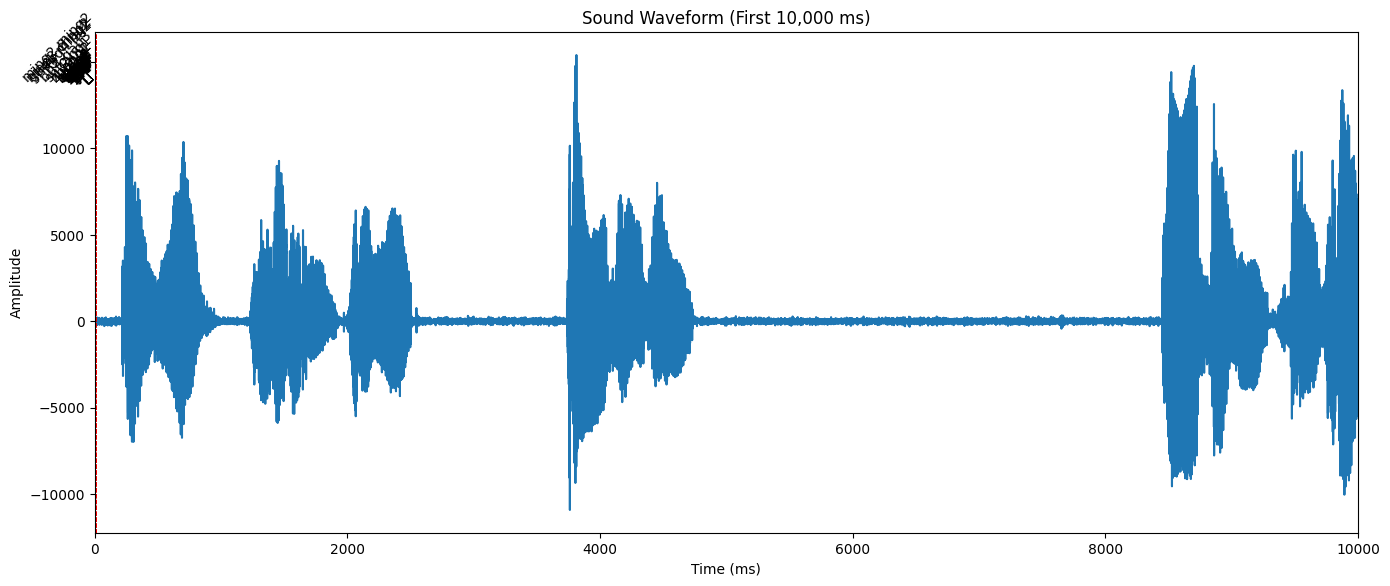

In [ ]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from pypinyin import pinyin, Style

# Load your audio file
audio = AudioSegment.from_mp3("/content/output_file.wav")

# Convert the audio to a numpy array
samples = np.array(audio.get_array_of_samples())

# Generate time values in milliseconds
time = np.linspace(0, len(audio), num=len(samples))

# Focus on the first 10,000 ms
end_time = 10000
end_index = int(len(samples) * (end_time / len(audio)))

# Plot the waveform for the first 10,000 ms
plt.figure(figsize=(14, 6))
plt.plot(time[:end_index], samples[:end_index])
plt.title("Sound Waveform (First 10,000 ms)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Function to convert Chinese text to Pinyin
def chinese_to_pinyin(text):
    return ' '.join([item[0] for item in pinyin(text, style=Style.TONE3)])

# Annotate the words on the waveform
for (ms, word) in word_timings:
    if ms <= end_time:
        plt.axvline(x=ms, color='r', linestyle='--', linewidth=0.8)
        pinyin_word = chinese_to_pinyin(word)
        plt.text(ms, max(samples[:end_index]) * 0.9, pinyin_word, rotation=45, ha='right')

plt.xlim(0, end_time)
plt.tight_layout()
plt.show()

The complete mapping of timestamps onto the waveform graph.

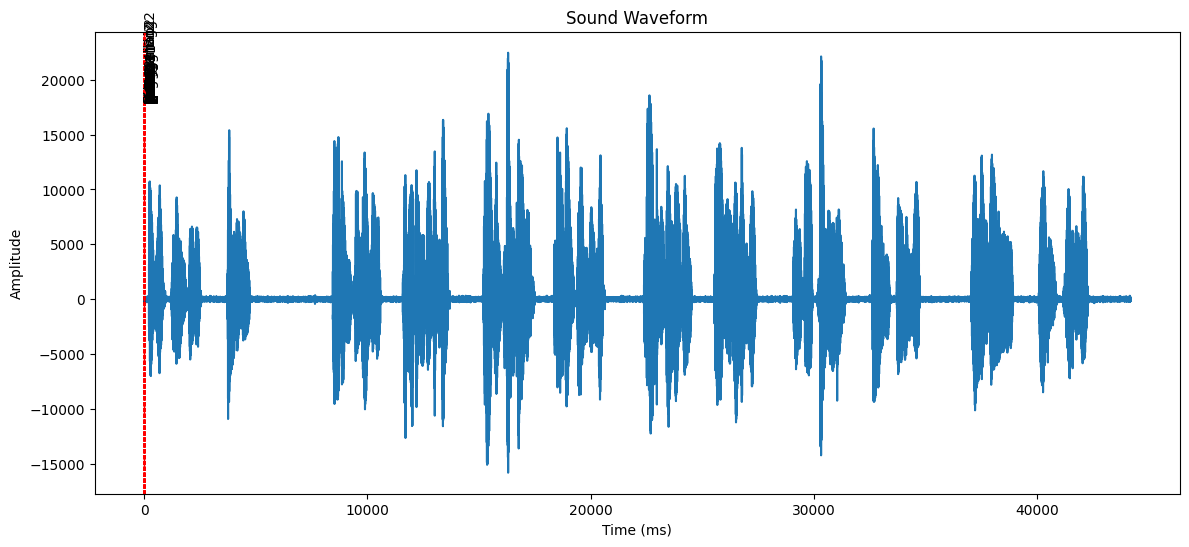

In [ ]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from pypinyin import pinyin, Style

# Load your audio file
audio = AudioSegment.from_mp3("/content/output_file.wav")

# Convert the audio to a numpy array
samples = np.array(audio.get_array_of_samples())

# Generate time values in milliseconds
time = np.linspace(0, len(audio), num=len(samples))

# Plot the waveform
plt.figure(figsize=(14, 6))
plt.plot(time, samples)
plt.title("Sound Waveform")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Function to convert Chinese text to Pinyin
def chinese_to_pinyin(text):
    return ' '.join([item[0] for item in pinyin(text, style=Style.TONE3)])

# Annotate the words on the waveform
for (ms, word) in word_timings:
    pinyin_word = chinese_to_pinyin(word)
    plt.axvline(x=ms, color='r', linestyle='--', linewidth=0.8)
    plt.text(ms, max(samples) * 0.8, pinyin_word, rotation=90, verticalalignment='bottom')

plt.show()

According to a researcher at EdUHK, the emotions conveyed while presenting a poem depend on several factors: stress (relative amplitude), duration (time spent reading each word), pauses (time paused after reading each word), and tone (changes in relative frequency/amplitude). All these factors are relative to the previous words presented by the same speaker.

In the earlier version of the analysis, duration was simply measured as the time elapsed between two consecutive words. However, the new version distinguishes between pauses and actual reading duration. Actual duration refers to the time spent reading the word, while pauses occur when no words are spoken. On the graph, the flat regions represent pauses, while the peaks indicate actual reading duration. By employing a dynamic threshold, we can effectively identify the regions that correspond to pauses, which are marked in green.

In [ ]:
'''

from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

def smooth_signal(signal, window_len=1000):
    """Smooth the signal using a simple moving average."""
    if len(signal) < window_len:
        window_len = len(signal)
    window = np.ones(int(window_len)) / float(window_len)
    return np.convolve(signal, window, 'same')

def calculate_dynamic_threshold(samples, factor=1.5):
    """Calculate a dynamic threshold based on the median amplitude of the signal."""
    median_amplitude = np.median(np.abs(samples))
    return median_amplitude * factor

def detect_pauses(audio, factor=1.5, min_silence_len=100, debounce_time=500):
    samples = np.array(audio.get_array_of_samples())
    samples = smooth_signal(samples, window_len=5000)
    sample_rate = audio.frame_rate

    amplitude_threshold = calculate_dynamic_threshold(samples, factor=factor)
    print("Calculated Amplitude Threshold:", amplitude_threshold)

    silent = np.abs(samples) < amplitude_threshold
    silent_segments = []
    current_start = None
    last_end = 0

    for i, is_silent in enumerate(silent):
        if is_silent:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                duration = (i - current_start) * 1000 / sample_rate
                if duration >= min_silence_len:
                    start_time = current_start * 1000 / sample_rate
                    if silent_segments and start_time <= last_end + debounce_time:
                        silent_segments[-1] = (silent_segments[-1][0], silent_segments[-1][1] + duration)
                    else:
                        silent_segments.append((start_time, duration))
                    last_end = start_time + duration
                current_start = None

    if current_start is not None:
        duration = (len(silent) - current_start) * 1000 / sample_rate
        start_time = current_start * 1000 / sample_rate
        if silent_segments and start_time <= last_end + debounce_time:
            silent_segments[-1] = (silent_segments[-1][0], silent_segments[-1][1] + duration)
        else:
            silent_segments.append((start_time, duration))

    return silent_segments

def plot_audio_with_pauses(audio, pauses):
    samples = np.array(audio.get_array_of_samples())
    times = np.linspace(0, len(samples) / audio.frame_rate, num=len(samples))

    plt.figure(figsize=(15, 5))
    plt.plot(times, samples, label='Waveform')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    for start, duration in pauses:
        plt.axvline(x=start/1000, color='r', linestyle='--', label='Pause Start' if 'Pause Start' not in plt.gca().get_legend_handles_labels()[1] else '')
        plt.axvspan(start/1000, (start + duration)/1000, color='y', alpha=0.3, label='Pause' if 'Pause' not in plt.gca().get_legend_handles_labels()[1] else '')

    plt.title('Audio Waveform and Detected Pauses')
    plt.legend()
    plt.show()

def analyze_audio_features(audio_file):
    audio = AudioSegment.from_file(audio_file)
    pauses = detect_pauses(audio)
    if pauses:
        print("Detected pauses (start time, duration):", pauses)
    else:
        print("No pauses detected based on the current settings.")
    plot_audio_with_pauses(audio, pauses)
    return pauses

# Example usage with the specified audio file path
pauses = analyze_audio_features('/content/output_file.wav')
print("Global Pauses:", pauses)
'''

'\n\nfrom pydub import AudioSegment\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ndef smooth_signal(signal, window_len=1000):\n    """Smooth the signal using a simple moving average."""\n    if len(signal) < window_len:\n        window_len = len(signal)\n    window = np.ones(int(window_len)) / float(window_len)\n    return np.convolve(signal, window, \'same\')\n\ndef calculate_dynamic_threshold(samples, factor=1.5):\n    """Calculate a dynamic threshold based on the median amplitude of the signal."""\n    median_amplitude = np.median(np.abs(samples))\n    return median_amplitude * factor\n\ndef detect_pauses(audio, factor=1.5, min_silence_len=100, debounce_time=500):\n    samples = np.array(audio.get_array_of_samples())\n    samples = smooth_signal(samples, window_len=5000)\n    sample_rate = audio.frame_rate\n\n    amplitude_threshold = calculate_dynamic_threshold(samples, factor=factor)\n    print("Calculated Amplitude Threshold:", amplitude_threshold)\n\n    silent = np.ab

The main update from the original code is switching from a median-based threshold calculation to an RMS (Root Mean Square) energy-based approach, which is generally more effective for speech analysis since it better captures the energy variations in audio. Additionally, I added audio normalization, reduced the threshold sensitivity (factor from 2.5 to 1.2), and increased the minimum silence length to 500ms to better distinguish between actual pauses and natural brief silences in speech.

Detected pauses (start time, duration): [(2572.6875, 1079.6875), (4794.3125, 3564.875), (10641.375, 888.25), (13673.6875, 1440.0), (17516.4375, 770.9375), (20642.5, 1676.4375), (24583.75, 878.0), (27471.9375, 1506.1875), (31424.3125, 1106.0), (34798.125, 2183.5625), (38978.875, 1015.6875), (42305.5, 1863.9375)]


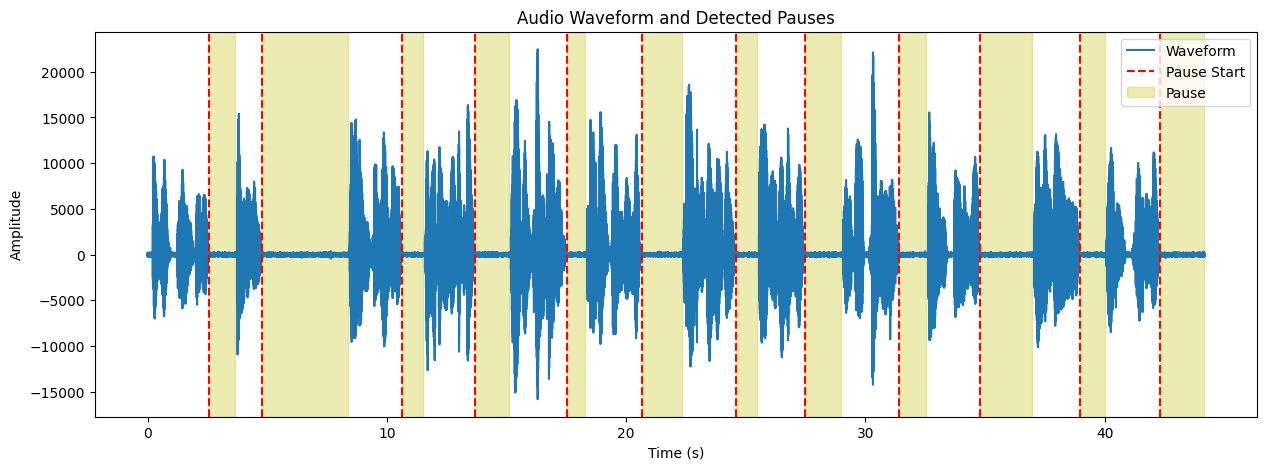

Global Pauses: [(2572.6875, 1079.6875), (4794.3125, 3564.875), (10641.375, 888.25), (13673.6875, 1440.0), (17516.4375, 770.9375), (20642.5, 1676.4375), (24583.75, 878.0), (27471.9375, 1506.1875), (31424.3125, 1106.0), (34798.125, 2183.5625), (38978.875, 1015.6875), (42305.5, 1863.9375)]


In [ ]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

def smooth_signal(signal, window_len=1000):
    """Smooth the signal using a simple moving average."""
    if len(signal) < window_len:
        window_len = len(signal)
    window = np.ones(int(window_len)) / float(window_len)
    return np.convolve(signal, window, 'same')

def calculate_variance_threshold(samples, window_size=1000):
    """Calculate local variance in sliding windows"""
    variance = np.array([np.var(samples[max(0, i-window_size):min(len(samples), i+window_size)])
                        for i in range(len(samples))])
    return smooth_signal(variance, window_len=window_size)

def detect_pauses(audio, min_silence_len=500, debounce_time=300):
    """Detect pauses in audio using envelope variance analysis."""
    samples = np.array(audio.get_array_of_samples())

    # Convert stereo to mono if necessary
    if audio.channels == 2:
        samples = samples.reshape((-1, 2)).mean(axis=1)

    # Normalize samples
    samples = samples / np.max(np.abs(samples))

    # Calculate envelope and smooth it
    envelope = np.abs(samples)
    smoothed_envelope = smooth_signal(envelope, window_len=1000)

    # Calculate variance threshold
    variance = calculate_variance_threshold(smoothed_envelope, window_size=1000)
    smoothed_variance = smooth_signal(variance, window_len=1000)

    # Combined threshold using both amplitude and variance
    amplitude_threshold = np.mean(smoothed_envelope) * 0.1
    variance_threshold = np.mean(smoothed_variance) * 0.1

    # Detect silence using both criteria
    silent = (smoothed_envelope < amplitude_threshold) & (smoothed_variance < variance_threshold)

    # Find silent segments (keeping the original segment detection logic)
    silent_segments = []
    current_start = None
    last_end = 0
    sample_rate = audio.frame_rate

    for i, is_silent in enumerate(silent):
        if is_silent and current_start is None:
            current_start = i
        elif not is_silent and current_start is not None:
            duration = (i - current_start) * 1000 / sample_rate
            if duration >= min_silence_len:
                start_time = current_start * 1000 / sample_rate
                if silent_segments and start_time <= last_end + debounce_time:
                    silent_segments[-1] = (silent_segments[-1][0], start_time + duration - silent_segments[-1][0])
                else:
                    silent_segments.append((start_time, duration))
                last_end = start_time + duration
            current_start = None

    # Handle case where audio ends with silence
    if current_start is not None:
        duration = (len(silent) - current_start) * 1000 / sample_rate
        if duration >= min_silence_len:
            start_time = current_start * 1000 / sample_rate
            if silent_segments and start_time <= last_end + debounce_time:
                silent_segments[-1] = (silent_segments[-1][0], start_time + duration - silent_segments[-1][0])
            else:
                silent_segments.append((start_time, duration))

    return silent_segments

def plot_audio_with_pauses(audio, pauses):
    """Plot the audio waveform with highlighted pause regions."""
    samples = np.array(audio.get_array_of_samples())
    if audio.channels == 2:
        samples = samples.reshape((-1, 2)).mean(axis=1)

    times = np.linspace(0, len(samples) / audio.frame_rate, num=len(samples))

    plt.figure(figsize=(15, 5))
    plt.plot(times, samples, label='Waveform')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    for start, duration in pauses:
        plt.axvline(x=start/1000, color='r', linestyle='--',
                   label='Pause Start' if 'Pause Start' not in plt.gca().get_legend_handles_labels()[1] else '')
        plt.axvspan(start/1000, (start + duration)/1000, color='y', alpha=0.3,
                   label='Pause' if 'Pause' not in plt.gca().get_legend_handles_labels()[1] else '')

    plt.title('Audio Waveform and Detected Pauses')
    plt.legend()
    plt.show()

def analyze_audio_features(audio_file):
    """Analyze audio file and detect pauses."""
    audio = AudioSegment.from_file(audio_file)
    pauses = detect_pauses(audio)
    if pauses:
        print("Detected pauses (start time, duration):", pauses)
    else:
        print("No pauses detected based on the current settings.")
    plot_audio_with_pauses(audio, pauses)
    return pauses

# Example usage
pauses = analyze_audio_features('/content/output_file.wav')
print("Global Pauses:", pauses)

By using a Fourier transform, we can analyze the audio's frequency over time.

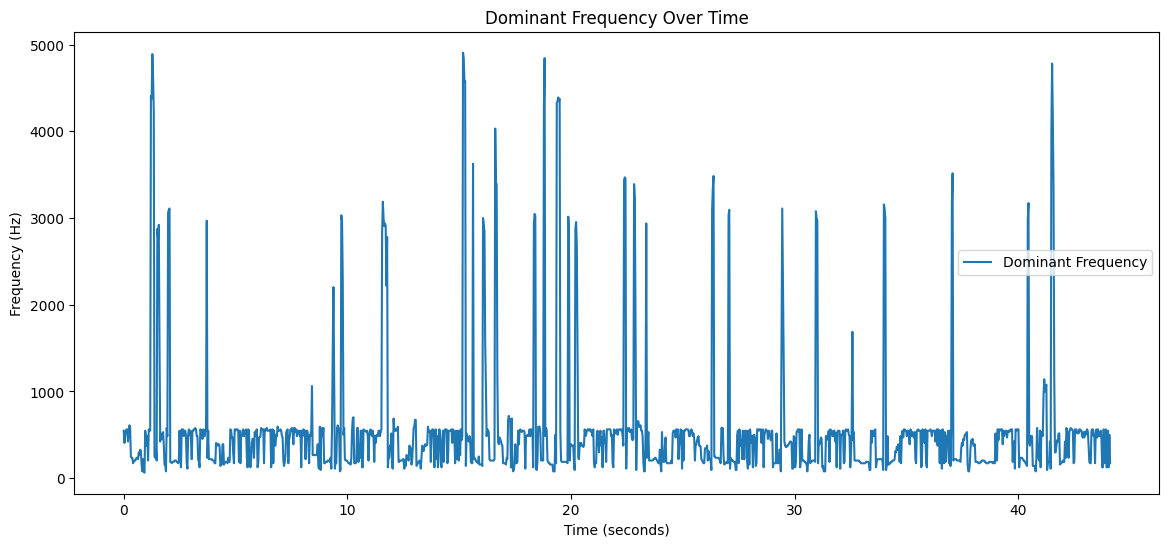

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def dominant_frequency(signal, sample_rate, window_size):
    """Calculate dominant frequency in each frame of the audio signal"""
    # Number of samples in each window
    step_size = window_size // 2
    frequencies = np.fft.rfftfreq(window_size, d=1./sample_rate)
    dominant_frequencies = []

    for i in range(0, len(signal) - window_size, step_size):
        # Windowing
        windowed_signal = signal[i:i + window_size] * np.hanning(window_size)
        # FFT
        magnitude = np.abs(np.fft.rfft(windowed_signal))
        # Find the peak in the FFT
        dominant_frequency = frequencies[np.argmax(magnitude)]
        dominant_frequencies.append(dominant_frequency)

    return dominant_frequencies

# Load the audio file
sample_rate, data = wavfile.read('/content/output_file.wav')

# Ensure audio is mono
if data.ndim > 1:
    data = data[:, 0]

# Parameters
window_size = 1024  # Adjust as necessary

# Calculate dominant frequencies
dom_freqs = dominant_frequency(data, sample_rate, window_size)

# Generate time values for each window
times = np.arange(len(dom_freqs)) * (window_size / 2) / sample_rate

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(times, dom_freqs, label='Dominant Frequency')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Dominant Frequency Over Time')
plt.legend()
plt.show()

After aligning the timestamps for each word, the amplitude waveform graph, pauses, and frequency, we can compile a table that includes the normalized amplitude, duration, pause, and frequency for each word. Research on poetry and emotion, as well as speech and emotion, indicates that these factors are crucial in determining the emotional impact of a poem presentation. In other words, we have extracted most, if not all, of the relevant information regarding the emotional content of the poem from the MP3 file and organized it into the table.

Better logic to classify the pauses compared with previous one
It filters out noise by only considering pauses > 100ms when calculating thresholds
It realistically considers small pauses (< 100ms) as "无停顿"
It has a fallback threshold of 500ms if no significant pauses are found

In [ ]:
from pydub import AudioSegment
import numpy as np

def perform_analysis(audio_file, word_timings, detected_pauses):
    audio = AudioSegment.from_wav(audio_file)
    analysis = []

    def find_pause_duration(start, end, pauses):
        pause_duration = 0
        for pause_start, pause_length in pauses:
            pause_end = pause_start + pause_length
            if pause_start >= start and pause_start < end:
                if pause_end <= end:
                    pause_duration += pause_length
                else:
                    pause_duration += end - pause_start
        return pause_duration

    previous_end_time = 0

    for i in range(len(word_timings) - 1):
        start_time, word = word_timings[i]
        next_start_time, _ = word_timings[i + 1]

        if previous_end_time != 0 and previous_end_time > start_time:
            start_time = previous_end_time

        word_end_time = next_start_time
        word_duration = word_end_time - start_time
        pause_duration = find_pause_duration(start_time, word_end_time, detected_pauses)
        actual_duration = word_duration - pause_duration

        start_ms = int(start_time)
        end_ms = int(word_end_time)

        if start_ms < len(audio) and end_ms <= len(audio) and start_ms < end_ms:
            segment = audio[start_ms:end_ms]
            samples = np.array(segment.get_array_of_samples())

            if len(samples) > 0:
                freq_spectrum = np.fft.fft(samples)
                freq_magnitudes = np.abs(freq_spectrum)
                freq_bins = np.fft.fftfreq(len(samples), 1 / segment.frame_rate)
                peak_freq = freq_bins[np.argmax(freq_magnitudes[:len(freq_magnitudes) // 2])]

                peak_amplitude = np.max(np.abs(samples))
                analysis.append({
                    "文字": word,
                    "声量": peak_amplitude,
                    "发声时长": actual_duration,
                    "停顿": pause_duration,
                    "音高": peak_freq
                })

        previous_end_time = word_end_time

    if not analysis:
        return []

    amplitudes = [entry["声量"] for entry in analysis]
    durations = [entry["发声时长"] for entry in analysis]
    pauses = [entry["停顿"] for entry in analysis]
    frequencies = [entry["音高"] for entry in analysis]

    amp_thresholds = np.percentile(amplitudes, [33, 66])
    duration_thresholds = np.percentile(durations, [33, 66])
    pause_thresholds = np.percentile([p for p in pauses if p > 100], [50]) if any(p > 100 for p in pauses) else [500]
    freq_thresholds = np.percentile(frequencies, [33, 66])

    categorized_data = []
    for entry in analysis:
        categorized_entry = {
            "文字": entry["文字"],
            "声量类别": ("低" if entry["声量"] < amp_thresholds[0] else
                             "中" if entry["声量"] < amp_thresholds[1] else
                             "高"),
            "发声时长类别": ("短" if entry["发声时长"] < duration_thresholds[0] else
                                  "中" if entry["发声时长"] < duration_thresholds[1] else
                                  "短"),
            "停顿类别": ("无停顿" if entry["停顿"] < 100 else
                               "短" if entry["停顿"] < pause_thresholds[0] else
                               "长"),
            "音高类别": ("低" if entry["音高"] < freq_thresholds[0] else
                              "中" if entry["音高"] < freq_thresholds[1] else
                              "高")
        }
        categorized_data.append(categorized_entry)

    return categorized_data

# Example usage
audio_file = '/content/output_file.wav'

results = perform_analysis(audio_file, word_timings, pauses)
for result in results:
    print(f"文字: {result['文字'].strip()}, 声量: {result['声量类别']}, "
          f"发声时长: {result['发声时长类别']}, 停顿: {result['停顿类别']}, "
          f"音高: {result['音高类别']}")

Store the table and poem in variables for future use.

In [ ]:
print(results)

[]


As previously mentioned, nearly all the useful information from the MP3 file has been extracted and organized into a textual table. We are now ready to leverage the impressive zero-shot capabilities of large language models (LLMs). The earlier steps involved using various methods to extract information from the audio file and attempting to reproduce the audio in textual form, aligning with the strengths of LLMs.

With two prompts—one asking the LLM to analyze the given poem and the second providing data from a student presentation to give feedback—we can demonstrate that this approach leads to improved performance.

The concept of converting audio files to text and utilizing LLMs is inspired by research on prompt-based time series analysis using LLMs. The rationale for employing LLMs as the final stage is twofold: first, their zero-shot abilities; and second, findings from previous studies on poetry and emotion. These studies indicate that the accurate expression of emotions in poem presentations is determined by analyzing the words and sentences of the poem, while emotional expression is reflected through the control of stress, pace, pauses, duration, and tone, all of which are subjective and relative to the individual. Consequently, there are no definitive "positive" samples in this area.

In [ ]:
import pandas as pd
from zhipuai import ZhipuAI
from functools import lru_cache

# Initialize ZhipuAI client
client = ZhipuAI(api_key="c877474dfac142718b25b9a59b6213d4.pUsT8xvPs7Dc0rjA")

# List to hold the conversation history
conversation_history = []

# Function to add a message to the conversation history
def add_to_history(role, content):
    conversation_history.append({"role": role, "content": content})

@lru_cache(maxsize=128)
def get_response_from_api(messages_tuple):
    messages = [dict(m) for m in messages_tuple]
    response = client.chat.completions.create(
        model="glm-4",
        messages=messages
    )
    return response.choices[0].message.content

def get_correct_poem_presentation(poem_content):
    add_to_history("user", f"作为老师，请用纯中文分析这首古诗的朗读技巧，避免使用任何英文。请从声音重点、停顿、节奏和语调方面逐句分析。\n{poem_title},{poem_content}")
    messages_tuple = tuple(tuple(d.items()) for d in conversation_history)
    return get_response_from_api(messages_tuple)

def correct_student_presentation():
    add_to_history("user", f"请用纯中文分析这位学生的朗读表现。我已将音频文件转换为文字描述：文字部分是学生朗读的内容，声量分为高中低三类，发声时长分为长中短三类，停顿时长分为长中短三类，音高也分为高中低三类。请逐句分析朗读情感并指出改进建议。\n{results}")
    messages_tuple = tuple(tuple(d.items()) for d in conversation_history)
    return get_response_from_api(messages_tuple)

print(get_correct_poem_presentation(poem_content))
print(correct_student_presentation())

这首诗是王之涣的《感遇四首·其一》，下面我将从声音重点、停顿、节奏和语调四个方面逐句分析这首古诗的朗读技巧。

1. “孤鸿海上来”
   - 声音重点：应在“孤”和“海”字上加重声音，突出孤鸿的孤独与海上的辽阔。
   - 停顿：在“上来”之间可以稍作停顿，以示句意的转换。
   - 节奏：这句宜用平缓的节奏，以映照孤鸿的孤寂飞行。
   - 语调：语调宜低沉，表现孤鸿的孤寂和远行的艰辛。

2. “池潢不敢顾”
   - 声音重点：“不敢”两字需加重，表现出孤鸿的谨慎与畏惧。
   - 停顿：句中无需明显停顿，但“池潢”与“不敢顾”之间应有流畅的连接。
   - 节奏：节奏比第一句稍快，突出孤鸿的匆匆一瞥。
   - 语调：语调应稍上扬，表现出孤鸿内心的紧张。

3. “侧见双翠鸟，巢在三珠树”
   - 声音重点：“双翠鸟”和“三珠树”是重点，需用清亮的声音来描绘它们的美丽和珍贵。
   - 停顿：“侧见”后可稍作停顿，再开始描绘双翠鸟的情景。
   - 节奏：这两句节奏宜轻快，以表现翠鸟的活泼和树上的和平景象。
   - 语调：语调应轻柔，带有一定的欣赏和赞叹。

4. “矫矫珍木巅，得无金丸惧？”
   - 声音重点：“矫矫”和“金丸”需强调，前者描绘树木的挺拔，后者表达诗人的疑问。
   - 停顿：“矫矫”后可以有小停顿，以区分两个意群。
   - 节奏：节奏应放缓，尤其在“得无金丸惧”时要稍作延长，以突出疑问。
   - 语调：疑问部分语调上扬，表示诗人内心的疑问和担忧。

5. “美服患人指，高明逼神恶？”
   - 声音重点：“美服”和“高明”是关键，要突出其表面的荣耀和背后的危险。
   - 停顿：在“患人指”和“逼神恶”之间应有适当的停顿，增强语句的节奏感。
   - 节奏：这句节奏应比前句快一些，以表现诗人的紧迫感。
   - 语调：在“患人指”和“逼神恶”时，语调宜抑扬顿挫，表达出对美服与高明所带来的负面影响的感叹。

6. “今我游冥冥，弋者何所慕！”
   - 声音重点：“游冥冥”和“何所慕”需强调，展现诗人的超然态度和对世事的看透。
   - 停顿：句中无明确停顿，但“今我游冥冥”后应有较明显的呼吸，以准备最后一句的强调。
   - 节奏：节奏再次放慢，尤其在最后一句要拉长音节，加强语气。
   - 语调：最后一句语调应下降，表达出诗